In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split


In [2]:
data=pd.read_csv("C:\Users\USER\Documents\Mall_Customers (1).csv")

In [3]:
data.head(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [4]:
data.rename(columns={'Annual Income (k$)':'Annual_Income','Spending Score (1-100)':'Spending_Score'},inplace=True)

In [5]:
data.Age=data.Age.replace([18,19,20],"18-20")
data.Age=data.Age.replace([21,22,23,24,25,26,27,28,29,30],"21-30")
data.Age=data.Age.replace([31,32,33,34,35,36,37,38,39,40],"31-40")
data.Age=data.Age.replace([41,42,43,44,45,46,47,48,49,50],"41-50")
data.Age=data.Age.replace([51,52,53,54,55,56,57,58,59,60],"51-60")
data.Age=data.Age.replace([61,62,63,64,65,66,67,68,69,70],"61-70")

<AxesSubplot:xlabel='Gender', ylabel='count'>

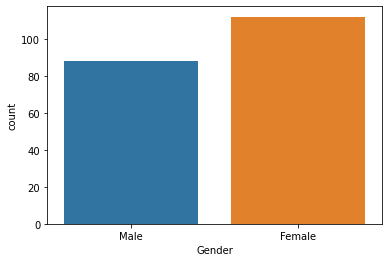

In [6]:
sns.countplot(x="Gender",data=data)

<AxesSubplot:xlabel='Age', ylabel='count'>

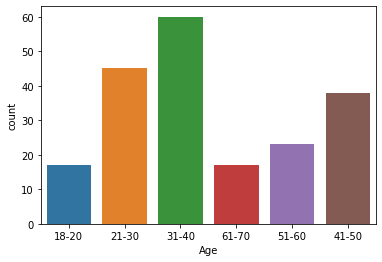

In [7]:
sns.countplot(x="Age",data=data)

<AxesSubplot:>

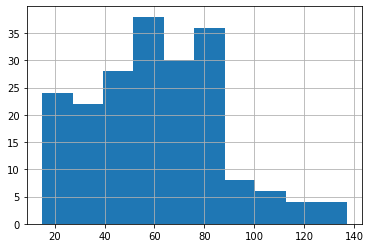

In [8]:
data.Annual_Income.hist()


<AxesSubplot:>

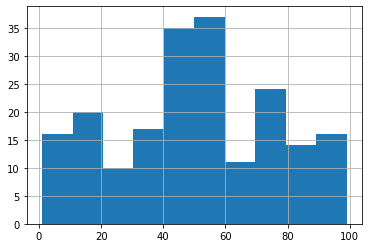

In [9]:
data.Spending_Score.hist()

<AxesSubplot:xlabel='Annual_Income', ylabel='Age'>

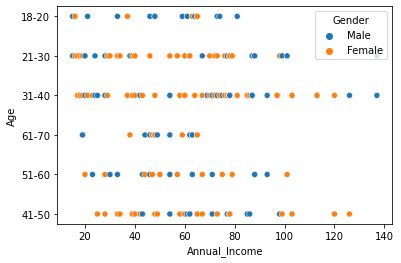

In [10]:
sns.scatterplot(data=data, x="Annual_Income", y="Age", hue="Gender")

<AxesSubplot:xlabel='Annual_Income', ylabel='Spending_Score'>

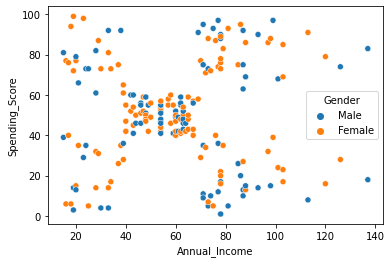

In [11]:
sns.scatterplot(data=data, x="Annual_Income", y="Spending_Score", hue="Gender")

<AxesSubplot:xlabel='Annual_Income', ylabel='Spending_Score'>

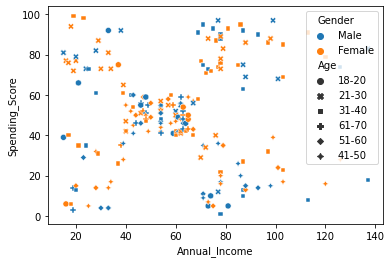

In [12]:
sns.scatterplot(data=data, x="Annual_Income", y="Spending_Score", hue="Gender", style="Age")

In [13]:
data.isnull().sum()

CustomerID        0
Gender            0
Age               0
Annual_Income     0
Spending_Score    0
dtype: int64

{'whiskers': [<matplotlib.lines.Line2D at 0x158ddc25820>,
 'caps': [<matplotlib.lines.Line2D at 0x158ddc25e80>,
 'boxes': [<matplotlib.lines.Line2D at 0x158ddc25550>],
 'medians': [<matplotlib.lines.Line2D at 0x158ddc333a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x158ddc33670>],
 'means': []}

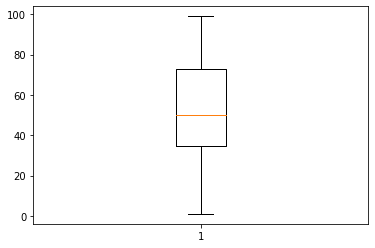

In [14]:
plt.boxplot(data.Spending_Score)

{'whiskers': [<matplotlib.lines.Line2D at 0x158ddc8e790>,
 'caps': [<matplotlib.lines.Line2D at 0x158ddc8ed30>,
 'boxes': [<matplotlib.lines.Line2D at 0x158ddc8e4c0>],
 'medians': [<matplotlib.lines.Line2D at 0x158ddc9d310>],
 'fliers': [<matplotlib.lines.Line2D at 0x158ddc9d5e0>],
 'means': []}

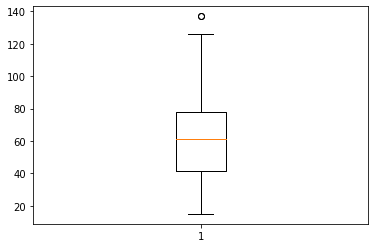

In [15]:
plt.boxplot(data.Annual_Income)

In [16]:
Q1=data.Annual_Income.quantile(0.25)
Q3=data.Annual_Income.quantile(0.75)
IQR=Q3-Q1
UE=Q3+1.5*(IQR)
LE=Q1-1.5*(IQR)
data.Annual_Income[data.Annual_Income>UE]=UE
data.Annual_Income[data.Annual_Income<LE]=LE

C:\Users\USER\AppData\Local\Temp\ipykernel_11500\3336029125.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.Annual_Income[data.Annual_Income>UE]=UE


{'whiskers': [<matplotlib.lines.Line2D at 0x158de0594f0>,
 'caps': [<matplotlib.lines.Line2D at 0x158de059a90>,
 'boxes': [<matplotlib.lines.Line2D at 0x158de059220>],
 'medians': [<matplotlib.lines.Line2D at 0x158de067070>],
 'fliers': [<matplotlib.lines.Line2D at 0x158de067370>],
 'means': []}

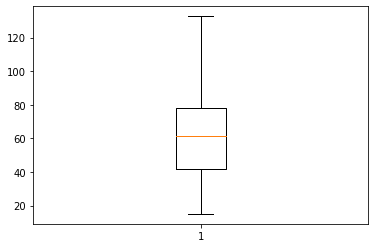

In [17]:
plt.boxplot(data.Annual_Income)

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   CustomerID      200 non-null    int64  
 1   Gender          200 non-null    object 
 2   Age             200 non-null    object 
 3   Annual_Income   200 non-null    float64
 4   Spending_Score  200 non-null    int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 7.9+ KB


In [19]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder() 
data['Gender']= label_encoder.fit_transform(data['Gender'])
data['Age']= label_encoder.fit_transform(data['Age'])

In [20]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler().fit(data)
scaled_data=scaler.transform(data)
data= pd.DataFrame(scaled_data)

In [21]:
import scipy.cluster.hierarchy as shc
link=shc.linkage(data)

{'icoord': [[5.0, 5.0, 15.0, 15.0],
  [55.0, 55.0, 65.0, 65.0],
  [45.0, 45.0, 60.0, 60.0],
  [35.0, 35.0, 52.5, 52.5],
  [105.0, 105.0, 115.0, 115.0],
  [95.0, 95.0, 110.0, 110.0],
  [125.0, 125.0, 135.0, 135.0],
  [145.0, 145.0, 155.0, 155.0],
  [175.0, 175.0, 185.0, 185.0],
  [165.0, 165.0, 180.0, 180.0],
  [150.0, 150.0, 172.5, 172.5],
  [130.0, 130.0, 161.25, 161.25],
  [102.5, 102.5, 145.625, 145.625],
  [85.0, 85.0, 124.0625, 124.0625],
  [75.0, 75.0, 104.53125, 104.53125],
  [43.75, 43.75, 89.765625, 89.765625],
  [205.0, 205.0, 215.0, 215.0],
  [225.0, 225.0, 235.0, 235.0],
  [210.0, 210.0, 230.0, 230.0],
  [195.0, 195.0, 220.0, 220.0],
  [245.0, 245.0, 255.0, 255.0],
  [265.0, 265.0, 275.0, 275.0],
  [305.0, 305.0, 315.0, 315.0],
  [295.0, 295.0, 310.0, 310.0],
  [285.0, 285.0, 302.5, 302.5],
  [335.0, 335.0, 345.0, 345.0],
  [325.0, 325.0, 340.0, 340.0],
  [365.0, 365.0, 375.0, 375.0],
  [385.0, 385.0, 395.0, 395.0],
  [370.0, 370.0, 390.0, 390.0],
  [435.0, 435.0, 445.0, 44

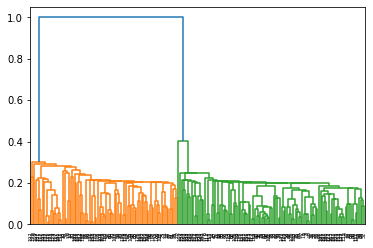

In [22]:
shc.dendrogram(link)


In [23]:
from sklearn.cluster import AgglomerativeClustering
clustering = AgglomerativeClustering(n_clusters = 3)
clustering.fit(link)

AgglomerativeClustering(n_clusters=3)

In [24]:
clabel=clustering.labels_
t= pd.DataFrame(clabel)